In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
import yfinance

In [2]:
symbols = [
    "^GSPC", # S&P 500
    "AAPL", # Apple Inc.
    "LUMN", # Lumen Technologies, Inc.
    "PG" # The Procter & Gamble Company
]

# 30 years (24 years Train/Val, 6 years Test)
stocks = yfinance.download (tickers = symbols, start = "1993-07-01", end = "2023-07-01")

[*********************100%***********************]  4 of 4 completed


In [12]:
stocks

Adj Close                                          Close  \
                  AAPL      LUMN          PG        ^GSPC        AAPL   
Date                                                                    
1993-06-30    0.289934  3.712421    6.176394   450.529999    0.352679   
1993-07-01    0.278924  3.697392    6.146700   449.019989    0.339286   
1993-07-02    0.282594  3.622241    6.117003   445.839996    0.343750   
1993-07-06    0.277089  3.712421    6.057620   441.429993    0.337054   
1993-07-07    0.267914  3.667334    6.161544   442.829987    0.325893   
...                ...       ...         ...          ...         ...   
2023-06-26  185.270004  1.990000  147.679520  4328.819824  185.270004   
2023-06-27  188.059998  2.090000  149.080688  4378.410156  188.059998   
2023-06-28  189.250000  2.180000  149.050888  4376.859863  189.250000   
2023-06-29  189.589996  2.200000  148.444702  4396.439941  189.589996   
2023-06-30  193.970001  2.260000  150.789932  4450.379883  193.970001   

                                                      High             ...  \
                 LUMN          PG        ^GSPC        AAPL       LUMN  ...   
Date                                                                   ...   
1993-06-30  13.722222   13.000000   450.529999    0.354911  13.722222  ...   
1993-07-01  13.666667   12.937500   449.019989    0.354911  13.722222  ...   
1993-07-02  13.388889   12.875000   445.839996    0.345982  13.666667  ...   
1993-07-06  13.722222   12.750000   441.429993    0.348214  13.833333  ...   
1993-07-07  13.555556   12.968750   442.829987    0.338170  13.722222  ...   
...               ...         ...          ...         ...        ...  ...   
2023-06-26   1.990000  148.610001  4328.819824  188.050003   2.030000  ...   
2023-06-27   2.090000  150.020004  4378.410156  188.389999   2.140000  ...   
2023-06-28   2.180000  149.990005  4376.859863  189.899994   2.190000  ...   
2023-06-29   2.200000  149.380005  4396.439941  190.070007   2.300000  ...   
2023-06-30   2.260000  151.740005  4450.379883  194.479996   2.320000  ...   

                   Low                     Open                         \
                    PG        ^GSPC        AAPL       LUMN          PG   
Date                                                                     
1993-06-30   12.875000   450.149994    0.345982  13.388889   12.875000   
1993-07-01   12.875000   448.709991    0.348214  13.666667   13.000000   
1993-07-02   12.843750   445.200012    0.341518  13.666667   12.937500   
1993-07-06   12.718750   441.420013    0.341518  13.388889   12.906250   
1993-07-07   12.718750   441.399994    0.334821  13.666667   12.750000   
...                ...          ...         ...        ...         ...   
2023-06-26  146.720001  4328.080078  186.830002   1.820000  148.100006   
2023-06-27  148.389999  4335.000000  185.889999   1.950000  148.440002   
2023-06-28  147.960007  4360.220215  187.929993   2.090000  149.330002   
2023-06-29  147.100006  4371.970215  189.080002   2.160000  148.479996   
2023-06-30  149.789993  4422.439941  191.630005   2.210000  149.830002   

                            Volume                                   
                  ^GSPC       AAPL        LUMN       PG       ^GSPC  
Date                                                                 
1993-06-30   450.690002  200256000    303300.0  5110400   281120000  
1993-07-01   450.540009  218164800    151650.0  2422800   292040000  
1993-07-02   449.019989  191632000    210600.0  2562000   220750000  
1993-07-06   445.859985  155254400    213300.0  3300800   234810000  
1993-07-07   441.399994  227035200    136350.0  3630800   253170000  
...                 ...        ...         ...      ...         ...  
2023-06-26  4344.839844   48088700  20292900.0  4353100  3415030000  
2023-06-27  4337.359863   50730800  18844200.0  5445400  3573500000  
2023-06-28  4367.479980   51216800  20745000.0  6733300  3739330000  
2023-06-29  4374.939

In [60]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7555 entries, 1993-06-30 to 2023-06-30
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   7555 non-null   float64
 1   (Adj Close, LUMN)   7554 non-null   float64
 2   (Adj Close, PG)     7555 non-null   float64
 3   (Adj Close, ^GSPC)  7555 non-null   float64
 4   (Close, AAPL)       7555 non-null   float64
 5   (Close, LUMN)       7554 non-null   float64
 6   (Close, PG)         7555 non-null   float64
 7   (Close, ^GSPC)      7555 non-null   float64
 8   (High, AAPL)        7555 non-null   float64
 9   (High, LUMN)        7554 non-null   float64
 10  (High, PG)          7555 non-null   float64
 11  (High, ^GSPC)       7555 non-null   float64
 12  (Low, AAPL)         7555 non-null   float64
 13  (Low, LUMN)         7554 non-null   float64
 14  (Low, PG)           7555 non-null   float64
 15  (Low, ^GSPC)        7555 non-null   f

In [11]:
stocks.Close

,AAPL,LUMN,PG,^GSPC
Date,,,,
1993-06-30,0.352679,13.722222,13.000000,450.529999
1993-07-01,0.339286,13.666667,12.937500,449.019989
1993-07-02,0.343750,13.388889,12.875000,445.839996
1993-07-06,0.337054,13.722222,12.750000,441.429993
1993-07-07,0.325893,13.555556,12.968750,442.829987
...,...,...,...,...
2023-06-26,185.270004,1.990000,148.610001,4328.819824
2023-06-27,188.059998,2.090000,150.020004,4378.410156
2023-06-28,189.250000,2.180000,149.990005,4376.859863


<AxesSubplot:xlabel='Date'>

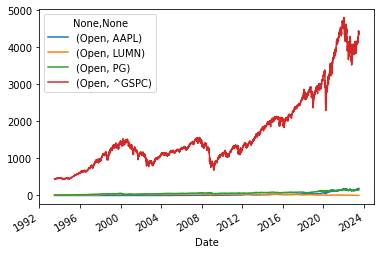

In [10]:
stocks[["Open"]].plot()

<AxesSubplot:xlabel='Date'>

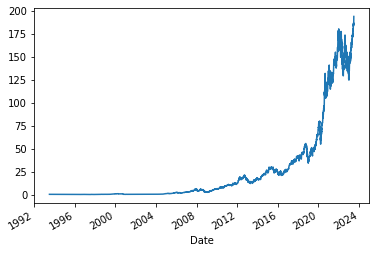

In [23]:
stocks["Adj Close"]["AAPL"].plot()

In [25]:
stocks["Adj Close"].max()

AAPL      193.970001
LUMN       20.668509
PG        158.212952
^GSPC    4796.560059
dtype: float64

In [26]:
stocks["Adj Close"].min()

AAPL       0.098179
LUMN       1.780000
PG         5.437727
^GSPC    438.920013
dtype: float64

In [27]:
normalized_data = stocks["Adj Close"]
normalized_data = (normalized_data - normalized_data.min()) / (normalized_data.max() - normalized_data.min())

<AxesSubplot:xlabel='Date'>

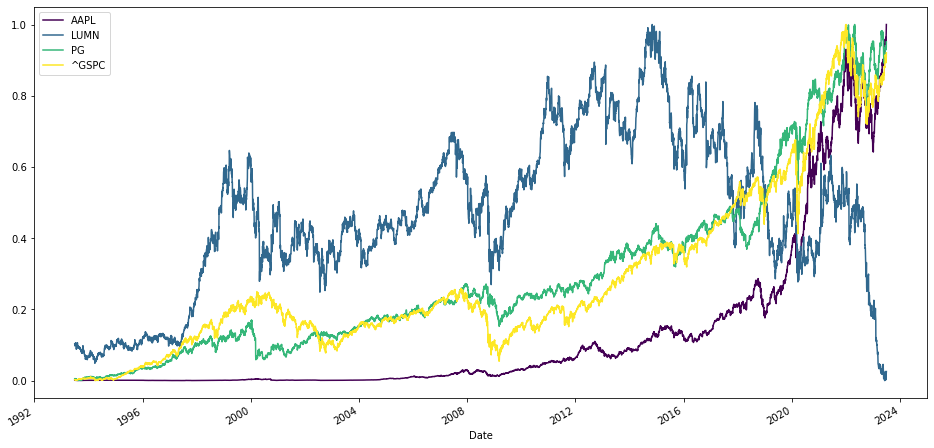

In [37]:
normalized_data.plot(figsize=(16,8), colormap="viridis")

In [38]:
stocks

Adj Close                                          Close  \
                  AAPL      LUMN          PG        ^GSPC        AAPL   
Date                                                                    
1993-06-30    0.289934  3.712421    6.176394   450.529999    0.352679   
1993-07-01    0.278924  3.697392    6.146700   449.019989    0.339286   
1993-07-02    0.282594  3.622241    6.117003   445.839996    0.343750   
1993-07-06    0.277089  3.712421    6.057620   441.429993    0.337054   
1993-07-07    0.267914  3.667334    6.161544   442.829987    0.325893   
...                ...       ...         ...          ...         ...   
2023-06-26  185.270004  1.990000  147.679520  4328.819824  185.270004   
2023-06-27  188.059998  2.090000  149.080688  4378.410156  188.059998   
2023-06-28  189.250000  2.180000  149.050888  4376.859863  189.250000   
2023-06-29  189.589996  2.200000  148.444702  4396.439941  189.589996   
2023-06-30  193.970001  2.260000  150.789932  4450.379883  193.970001   

                                                      High             ...  \
                 LUMN          PG        ^GSPC        AAPL       LUMN  ...   
Date                                                                   ...   
1993-06-30  13.722222   13.000000   450.529999    0.354911  13.722222  ...   
1993-07-01  13.666667   12.937500   449.019989    0.354911  13.722222  ...   
1993-07-02  13.388889   12.875000   445.839996    0.345982  13.666667  ...   
1993-07-06  13.722222   12.750000   441.429993    0.348214  13.833333  ...   
1993-07-07  13.555556   12.968750   442.829987    0.338170  13.722222  ...   
...               ...         ...          ...         ...        ...  ...   
2023-06-26   1.990000  148.610001  4328.819824  188.050003   2.030000  ...   
2023-06-27   2.090000  150.020004  4378.410156  188.389999   2.140000  ...   
2023-06-28   2.180000  149.990005  4376.859863  189.899994   2.190000  ...   
2023-06-29   2.200000  149.380005  4396.439941  190.070007   2.300000  ...   
2023-06-30   2.260000  151.740005  4450.379883  194.479996   2.320000  ...   

                   Low                     Open                         \
                    PG        ^GSPC        AAPL       LUMN          PG   
Date                                                                     
1993-06-30   12.875000   450.149994    0.345982  13.388889   12.875000   
1993-07-01   12.875000   448.709991    0.348214  13.666667   13.000000   
1993-07-02   12.843750   445.200012    0.341518  13.666667   12.937500   
1993-07-06   12.718750   441.420013    0.341518  13.388889   12.906250   
1993-07-07   12.718750   441.399994    0.334821  13.666667   12.750000   
...                ...          ...         ...        ...         ...   
2023-06-26  146.720001  4328.080078  186.830002   1.820000  148.100006   
2023-06-27  148.389999  4335.000000  185.889999   1.950000  148.440002   
2023-06-28  147.960007  4360.220215  187.929993   2.090000  149.330002   
2023-06-29  147.100006  4371.970215  189.080002   2.160000  148.479996   
2023-06-30  149.789993  4422.439941  191.630005   2.210000  149.830002   

                            Volume                                   
                  ^GSPC       AAPL        LUMN       PG       ^GSPC  
Date                                                                 
1993-06-30   450.690002  200256000    303300.0  5110400   281120000  
1993-07-01   450.540009  218164800    151650.0  2422800   292040000  
1993-07-02   449.019989  191632000    210600.0  2562000   220750000  
1993-07-06   445.859985  155254400    213300.0  3300800   234810000  
1993-07-07   441.399994  227035200    136350.0  3630800   253170000  
...                 ...        ...         ...      ...         ...  
2023-06-26  4344.839844   48088700  20292900.0  4353100  3415030000  
2023-06-27  4337.359863   50730800  18844200.0  5445400  3573500000  
2023-06-28  4367.479980   51216800  20745000.0  6733300  3739330000  
2023-06-29  4374.939

In [48]:
stocks.to_csv("historically_stocks.csv")

In [3]:
loaded_stocks = pd.read_csv("historically_stocks.csv", index_col=0, header=[0, 1])

In [4]:
loaded_stocks

Adj Close                                          Close  \
                  AAPL      LUMN          PG        ^GSPC        AAPL   
Date                                                                    
1993-06-30    0.289934  3.712421    6.176394   450.529999    0.352679   
1993-07-01    0.278924  3.697392    6.146700   449.019989    0.339286   
1993-07-02    0.282594  3.622241    6.117003   445.839996    0.343750   
1993-07-06    0.277089  3.712421    6.057620   441.429993    0.337054   
1993-07-07    0.267914  3.667334    6.161544   442.829987    0.325893   
...                ...       ...         ...          ...         ...   
2023-06-26  185.270004  1.990000  147.679520  4328.819824  185.270004   
2023-06-27  188.059998  2.090000  149.080688  4378.410156  188.059998   
2023-06-28  189.250000  2.180000  149.050888  4376.859863  189.250000   
2023-06-29  189.589996  2.200000  148.444702  4396.439941  189.589996   
2023-06-30  193.970001  2.260000  150.789932  4450.379883  193.970001   

                                                      High             ...  \
                 LUMN          PG        ^GSPC        AAPL       LUMN  ...   
Date                                                                   ...   
1993-06-30  13.722222   13.000000   450.529999    0.354911  13.722222  ...   
1993-07-01  13.666667   12.937500   449.019989    0.354911  13.722222  ...   
1993-07-02  13.388889   12.875000   445.839996    0.345982  13.666667  ...   
1993-07-06  13.722222   12.750000   441.429993    0.348214  13.833333  ...   
1993-07-07  13.555556   12.968750   442.829987    0.338170  13.722222  ...   
...               ...         ...          ...         ...        ...  ...   
2023-06-26   1.990000  148.610001  4328.819824  188.050003   2.030000  ...   
2023-06-27   2.090000  150.020004  4378.410156  188.389999   2.140000  ...   
2023-06-28   2.180000  149.990005  4376.859863  189.899994   2.190000  ...   
2023-06-29   2.200000  149.380005  4396.439941  190.070007   2.300000  ...   
2023-06-30   2.260000  151.740005  4450.379883  194.479996   2.320000  ...   

                   Low                     Open                         \
                    PG        ^GSPC        AAPL       LUMN          PG   
Date                                                                     
1993-06-30   12.875000   450.149994    0.345982  13.388889   12.875000   
1993-07-01   12.875000   448.709991    0.348214  13.666667   13.000000   
1993-07-02   12.843750   445.200012    0.341518  13.666667   12.937500   
1993-07-06   12.718750   441.420013    0.341518  13.388889   12.906250   
1993-07-07   12.718750   441.399994    0.334821  13.666667   12.750000   
...                ...          ...         ...        ...         ...   
2023-06-26  146.720001  4328.080078  186.830002   1.820000  148.100006   
2023-06-27  148.389999  4335.000000  185.889999   1.950000  148.440002   
2023-06-28  147.960007  4360.220215  187.929993   2.090000  149.330002   
2023-06-29  147.100006  4371.970215  189.080002   2.160000  148.479996   
2023-06-30  149.789993  4422.439941  191.630005   2.210000  149.830002   

                            Volume                                   
                  ^GSPC       AAPL        LUMN       PG       ^GSPC  
Date                                                                 
1993-06-30   450.690002  200256000    303300.0  5110400   281120000  
1993-07-01   450.540009  218164800    151650.0  2422800   292040000  
1993-07-02   449.019989  191632000    210600.0  2562000   220750000  
1993-07-06   445.859985  155254400    213300.0  3300800   234810000  
1993-07-07   441.399994  227035200    136350.0  3630800   253170000  
...                 ...        ...         ...      ...         ...  
2023-06-26  4344.839844   48088700  20292900.0  4353100  3415030000  
2023-06-27  4337.359863   50730800  18844200.0  5445400  3573500000  
2023-06-28  4367.479980   51216800  20745000.0  6733300  3739330000  
2023-06-29  4374.939

In [4]:
loaded_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7555 entries, 1993-06-30 to 2023-06-30
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, AAPL)   7555 non-null   float64
 1   (Adj Close, LUMN)   7555 non-null   float64
 2   (Adj Close, PG)     7555 non-null   float64
 3   (Adj Close, ^GSPC)  7555 non-null   float64
 4   (Close, AAPL)       7555 non-null   float64
 5   (Close, LUMN)       7554 non-null   float64
 6   (Close, PG)         7555 non-null   float64
 7   (Close, ^GSPC)      7555 non-null   float64
 8   (High, AAPL)        7555 non-null   float64
 9   (High, LUMN)        7554 non-null   float64
 10  (High, PG)          7555 non-null   float64
 11  (High, ^GSPC)       7555 non-null   float64
 12  (Low, AAPL)         7555 non-null   float64
 13  (Low, LUMN)         7554 non-null   float64
 14  (Low, PG)           7555 non-null   float64
 15  (Low, ^GSPC)        7555 non-null   float64
 

In [7]:
loaded_stocks.iloc[6429:6680]["Adj Close"]["AAPL"]

Date
2019-01-10    37.003250
2019-01-11    36.639957
2019-01-14    36.088993
2019-01-15    36.827621
2019-01-16    37.277531
                ...    
2020-01-02    73.347939
2020-01-03    72.634865
2020-01-06    73.213615
2020-01-07    72.869278
2020-01-08    74.041489
Name: AAPL, Length: 251, dtype: float64

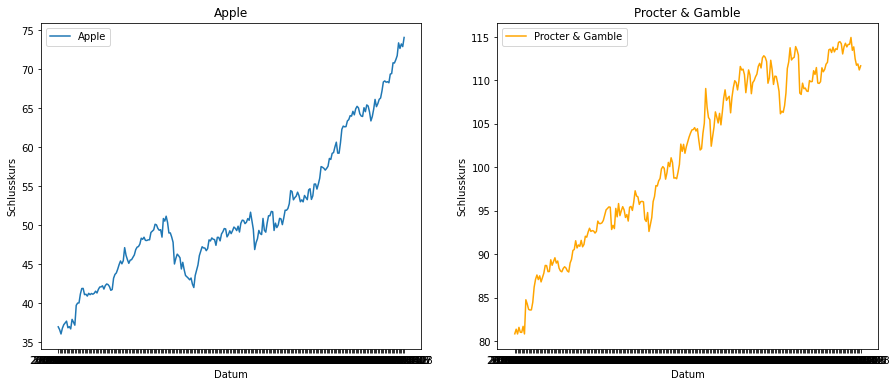

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

from matplotlib.dates import MonthLocator, DateFormatter

# Plot für die erste Aktie
ax1.plot(loaded_stocks.iloc[6429:6680]["Adj Close"].index, loaded_stocks.iloc[6429:6680]["Adj Close"]["AAPL"], label="Apple")
ax1.set_title("Apple")
ax1.set_xlabel("Datum")
ax1.set_ylabel("Schlusskurs")
ax1.legend()

# Plot für die zweite Aktie
ax2.plot(loaded_stocks.iloc[6429:6680]["Adj Close"].index, loaded_stocks.iloc[6429:6680]["Adj Close"]["PG"], label="Procter & Gamble", color="orange")
ax2.set_title("Procter & Gamble")
ax2.set_xlabel("Datum")
ax2.set_ylabel("Schlusskurs")
ax2.legend()
"""
date_format = DateFormatter("%b %Y")

ax1.xaxis.set_major_locator(MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(date_format)

ax2.xaxis.set_major_locator(MonthLocator(interval=1))
ax2.xaxis.set_major_formatter(date_format)"""

# Diagramme anzeigen
plt.show()